<a href="https://colab.research.google.com/github/ulfa03/Chili-Leaf-Classification-with-CNN-and-CV/blob/main/CNN%2010K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os
import numpy as np

train_dir = r'C:\Users\PC 09-316\Documents\PA-Ulfa Damayanti\Dataset Daun Cabai\train'
target_per_class = 2300  # target maksimum per kelas

# Konfigurasi augmentasi
datagen = ImageDataGenerator(
    zoom_range=0.2,
    brightness_range=(0.8, 1.2),
    rescale=1./255,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Proses augmentasi per kelas
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    current_count = len(images)

    print(f"Kelas {class_name}: {current_count} gambar")

    if current_count >= target_per_class:
        print(f"  → Melewati, sudah mencapai atau melebihi {target_per_class}")
        continue

    needed = target_per_class - current_count
    print(f"  → Menambahkan {needed} gambar melalui augmentasi")

    i = 0
    while i < needed:
        img_name = images[i % len(images)]  # ambil gambar secara berulang
        img_path = os.path.join(class_path, img_name)

        img = load_img(img_path, target_size=(224, 224))
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)

        aug_iter = datagen.flow(
            x,
            batch_size=1,
            save_to_dir=class_path,
            save_prefix='aug',
            save_format='jpeg'
        )

        next(aug_iter)
        i += 1

print("Augmentasi selesai.")

Kelas Healthy Leaf: 550 gambar
  → Menambahkan 1750 gambar melalui augmentasi
Kelas Leaf Curl: 550 gambar
  → Menambahkan 1750 gambar melalui augmentasi
Kelas Spot Leaf: 550 gambar
  → Menambahkan 1750 gambar melalui augmentasi
Kelas Whitefly Leaf: 550 gambar
  → Menambahkan 1750 gambar melalui augmentasi
Kelas Yellowish Leaf: 550 gambar
  → Menambahkan 1750 gambar melalui augmentasi
Augmentasi selesai.


In [ ]:
import os
import shutil
import random
from tqdm import tqdm

original_train_dir = r'C:\Users\PC 09-316\Documents\PA-Ulfa Damayanti\Dataset Daun Cabai\train'
base_dir = r'C:\Users\PC 09-316\Documents\PA-Ulfa Damayanti\Dataset Daun Cabai'

all_data_dir = os.path.join(base_dir, 'all_data')
os.makedirs(all_data_dir, exist_ok=True)

for class_name in os.listdir(original_train_dir):
    src_class_path = os.path.join(original_train_dir, class_name)
    dst_class_path = os.path.join(all_data_dir, class_name)
    shutil.move(src_class_path, dst_class_path)

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')
for dir_path in [train_dir, val_dir, test_dir]:
    os.makedirs(dir_path, exist_ok=True)

for class_name in os.listdir(all_data_dir):
    class_path = os.path.join(all_data_dir, class_name)
    images = os.listdir(class_path)
    random.shuffle(images)

    n_total = len(images)
    n_train = int(0.8 * n_total)
    n_val = int(0.1 * n_total)
    n_test = n_total - n_train - n_val

    split_map = {
        train_dir: images[:n_train],
        val_dir: images[n_train:n_train + n_val],
        test_dir: images[n_train + n_val:]
    }

    for target_dir, image_list in split_map.items():
        class_target_path = os.path.join(target_dir, class_name)
        os.makedirs(class_target_path, exist_ok=True)
        for image_name in tqdm(image_list, desc=f"{class_name} → {os.path.basename(target_dir)}"):
            src = os.path.join(class_path, image_name)
            dst = os.path.join(class_target_path, image_name)
            shutil.copy2(src, dst)

Yellowish Leaf → test: 100%|████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 224.82it/s]


Distribusi Kelas (Train):
  Healthy: 1717
  Leaf Curl: 1724
  Leaf Spot: 1720
  Whitefly: 1718
  Yellowish: 1734


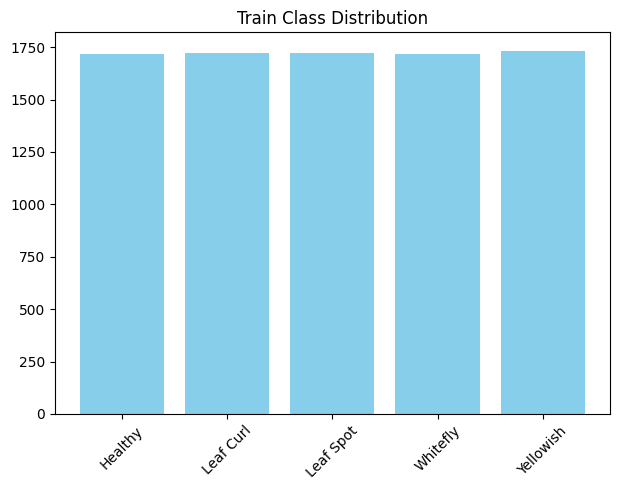

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt

# Path direktori
train_dir = r'C:\Users\PC 09-316\Documents\PA-Ulfa Damayanti\Dataset Daun Cabai\train'
test_dir = r'C:\Users\PC 09-316\Documents\PA-Ulfa Damayanti\Dataset Daun Cabai\test'

label_map = {
    'Healthy Leaf': 'Healthy',
    'Yellowish Leaf': 'Yellowish',
    'Leaf Curl': 'Leaf Curl',
    'Spot Leaf': 'Leaf Spot',
    'Whitefly Leaf': 'Whitefly'
}

def count_images_per_class(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            num_images = len([
                f for f in os.listdir(class_path)
                if f.lower().endswith(('.jpg', '.png', '.jpeg'))
            ])
            class_counts[class_name] = num_images
    return class_counts

train_counts = count_images_per_class(train_dir)



train_counts_named = {label_map[k]: v for k, v in train_counts.items()}


print("Distribusi Kelas (Train):")
for label, count in train_counts_named.items():
    print(f"  {label}: {count}")

# Plot bar chart
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.bar(train_counts_named.keys(), train_counts_named.values(), color='skyblue')
plt.title("Train Class Distribution")
plt.xticks(rotation=45)



plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = r'C:\Users\PC 09-316\Documents\PA-Ulfa Damayanti\Dataset Daun Cabai'
train_dir = base_dir + r'\train'
val_dir = base_dir + r'\val'
test_dir = base_dir + r'\test'

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 8613 images belonging to 5 classes.
Found 1074 images belonging to 5 classes.
Found 1081 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential()
# Convolutional layer pertama
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer kedua
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer ketiga
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Fully connected layer pertama
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Compile model
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Cek arsitektur model
model.summary()


C:\Users\PC 09-316\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,245,957 (84.86 MB)

 Trainable params: 22,245,957 (84.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

# ReduceLROnPlateau: mengurangi learning rate saat val_loss stagnan
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

# EarlyStopping: hentikan training jika val_loss tidak membaik
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,             # berhenti jika tidak ada perbaikan dalam 5 epoch
    restore_best_weights=True,  # kembali ke model dengan val_loss terbaik
    verbose=1
)

# Gabungkan semua callback
callbacks = [checkpoint, reduce_lr, early_stop]

# Training model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=callbacks
)

Epoch 1/50


C:\Users\PC 09-316\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 753ms/step - accuracy: 0.4656 - loss: 1.2656
Epoch 1: val_loss improved from inf to 0.72661, saving model to best_model.keras
270/270 ━━━━━━━━━━━━━━━━━━━━ 211s 776ms/step - accuracy: 0.4659 - loss: 1.2649 - val_accuracy: 0.7272 - val_loss: 0.7266 - learning_rate: 1.0000e-04
Epoch 2/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 755ms/step - accuracy: 0.7215 - loss: 0.7690
Epoch 2: val_loss improved from 0.72661 to 0.56349, saving model to best_model.keras
270/270 ━━━━━━━━━━━━━━━━━━━━ 210s 777ms/step - accuracy: 0.7216 - loss: 0.7688 - val_accuracy: 0.8063 - val_loss: 0.5635 - learning_rate: 1.0000e-04
Epoch 3/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 750ms/step - accuracy: 0.7838 - loss: 0.5769
Epoch 3: val_loss improved from 0.56349 to 0.46729, saving model to best_model.keras
270/270 ━━━━━━━━━━━━━━━━━━━━ 209s 772ms/step - accuracy: 0.7838 - loss: 0.5768 - val_accuracy: 0.8445 - val_loss: 0.4673 - learning_rate: 1.0000e-04
Epoch 4/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 750ms/

In [ ]:
# Evaluasi di data test
loss, accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {accuracy:.4f}")

loss, acc = model.evaluate(test_generator)
print(f"Akurasi akhir di data test: {acc:.2f}")

34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.9063 - loss: 0.3000
Test accuracy: 0.9167
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9063 - loss: 0.3000
Akurasi akhir di data test: 0.92


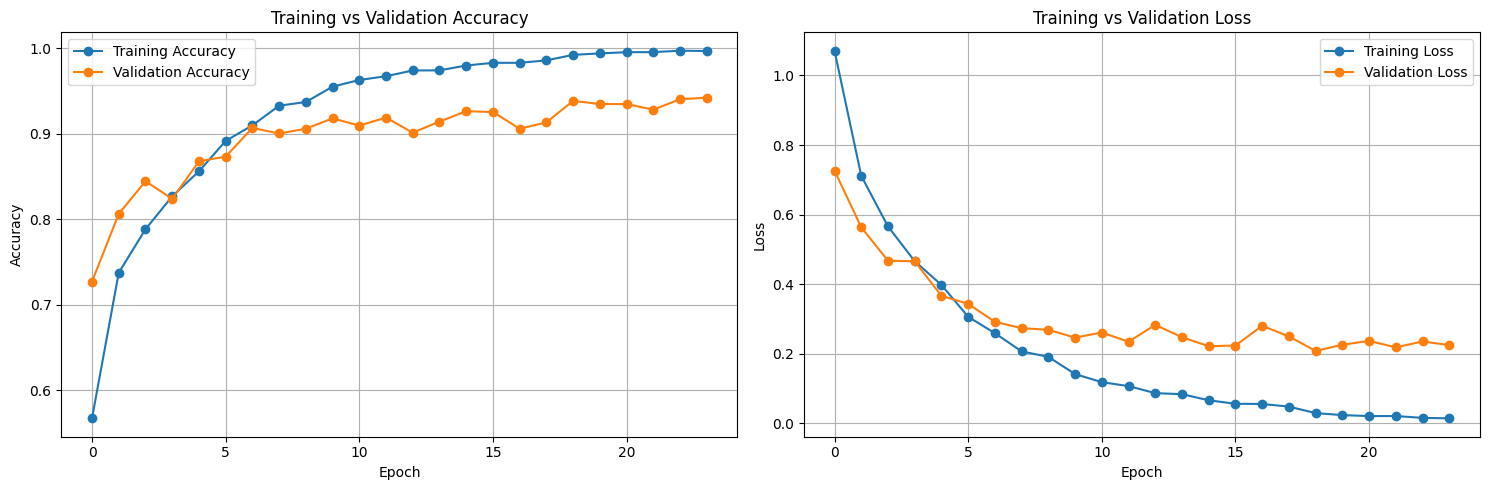

In [ ]:
import matplotlib.pyplot as plt

# Plot akurasi
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step


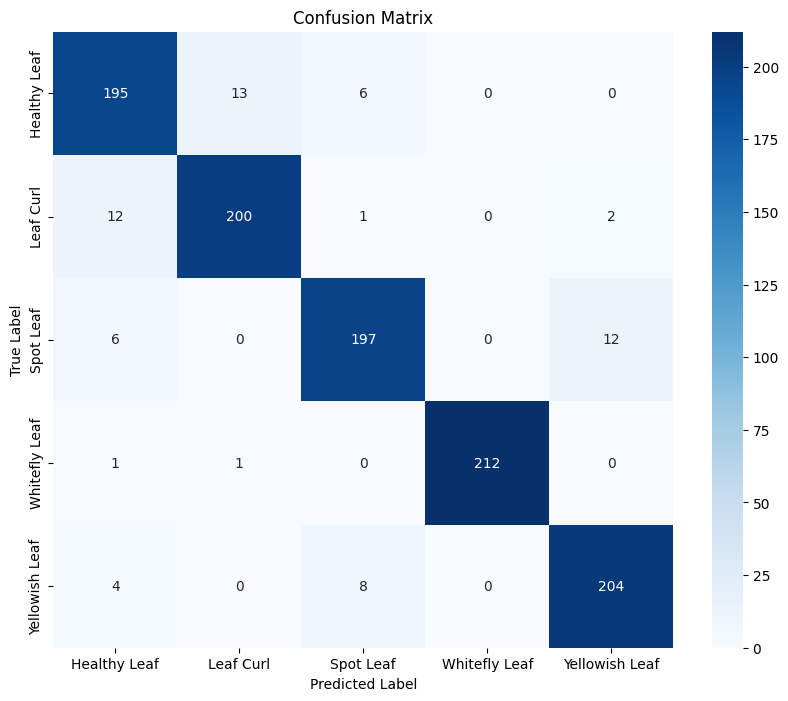


Classification Report:

                precision    recall  f1-score   support

  Healthy Leaf       0.89      0.91      0.90       214
     Leaf Curl       0.93      0.93      0.93       215
     Spot Leaf       0.93      0.92      0.92       215
 Whitefly Leaf       1.00      0.99      1.00       214
Yellowish Leaf       0.94      0.94      0.94       216

      accuracy                           0.94      1074
     macro avg       0.94      0.94      0.94      1074
  weighted avg       0.94      0.94      0.94      1074



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)


y_true = val_generator.classes


cm = confusion_matrix(y_true, y_pred)

class_names = list(val_generator.class_indices.keys())

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step


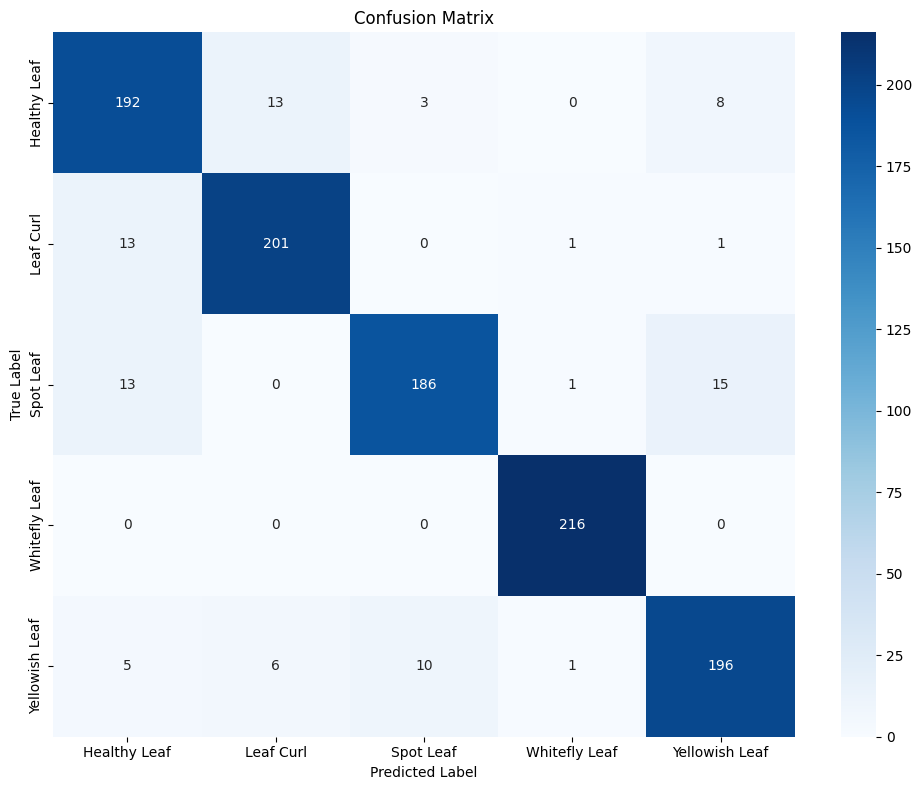


Classification Report:

                precision    recall  f1-score   support

  Healthy Leaf       0.86      0.89      0.87       216
     Leaf Curl       0.91      0.93      0.92       216
     Spot Leaf       0.93      0.87      0.90       215
 Whitefly Leaf       0.99      1.00      0.99       216
Yellowish Leaf       0.89      0.90      0.89       218

      accuracy                           0.92      1081
     macro avg       0.92      0.92      0.92      1081
  weighted avg       0.92      0.92      0.92      1081



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

class_names = list(test_generator.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))
